In [1]:
from dotenv import load_dotenv
load_dotenv()
import os

#os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm = ChatGroq(model = "qwen/qwen3-32b")
result = llm.invoke("Hello")
result

AIMessage(content='<think>\nOkay, the user said "Hello". I should respond in a friendly and welcoming manner. Maybe start with a greeting and ask how I can assist them. Keep it simple and open-ended to encourage them to share what they need help with. Let me make sure the tone is positive and approachable. Alright, something like "Hello! How can I assist you today?" That should work.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 9, 'total_tokens': 101, 'completion_time': 0.179742374, 'completion_tokens_details': None, 'prompt_time': 0.000239076, 'prompt_tokens_details': None, 'queue_time': 0.051621284, 'total_time': 0.17998145}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019ba17d-12e2-74f0-a006-df25b1a87f2f-0', tool_calls=[], invalid_tool_calls=[],

In [13]:
from typing_extensions import TypedDict
from langgraph.graph import START,END, StateGraph
from IPython.display import Image,display

# graph state

class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [18]:
## nodes
def generate_characters(state:State):
    """generate character description"""
    msg = llm.invoke(f"create two characters names and brief their traits for a story about {state['topic']}")
    return {"characters":msg.content}


def generate_setting(state:State):
    """generate story setting"""
    msg = llm.invoke(f"describe a vivid setting for story about  {state['topic']}")
    return {"settings":msg.content}

def generate_premise(state:State):
    """generate story premise"""
    msg = llm.invoke(f"write a one sentence plot premise for a story about  {state['topic']}")
    return {"premises":msg.content}


def combine_elements(state:State):
    """combine characters,story setting and story premise into an intro"""
    msg = llm.invoke(f"write a short story introducing using these elements: \n"
                    f"characters :{state['characters']}\n"
                    f"setting :{state['settings']}\n"
                    f"premise :{state['premises']}\n"
                    
                    
                    
                    )
    return {"story_intro":msg.content}
    

In [19]:
graph = StateGraph(State)
graph.add_node("character",generate_characters)
graph.add_node("setting",generate_setting)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_elements)


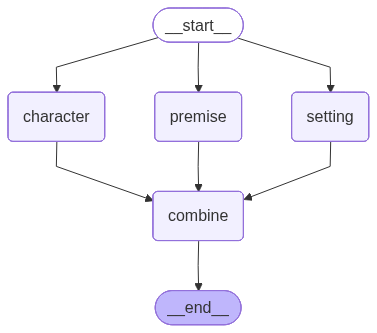

In [20]:
### edges
graph.add_edge(START,"character")
graph.add_edge(START,"setting")
graph.add_edge(START,"premise")
graph.add_edge("character","combine")
graph.add_edge("setting","combine")
graph.add_edge("premise","combine")
graph.add_edge("combine",END)

compiled_graph = graph.compile()
display(Image(compiled_graph.get_graph().draw_mermaid_png()))




In [21]:
state = {"topic":"time travel"}
compiled_graph.invoke(state)

{'topic': 'time travel',
 'characters': '<think>\nOkay, the user wants me to create two character names and briefly describe their traits for a time travel story. Let me start by thinking about common tropes in time travel stories. There\'s usually a protagonist who\'s the time traveler and maybe someone who stays in the present or another anchor character.\n\nFirst, I need names. Maybe something that sounds a bit unique but not too complicated. Let me think... For the time traveler, maybe a name that suggests curiosity or a scientific mind. Like "Elias" – it\'s classic but not too common. Then for the other character, perhaps someone more grounded, maybe a friend or a family member. "Lena" could work, it\'s simple and approachable.\n\nNow their traits. Elias should be the one involved in the time travel mechanics. Maybe he\'s a physicist or inventor. He\'s driven, curious, maybe a bit reckless. He wants to fix the past or learn from it, but his actions have consequences. He could be i